In [7]:
import cv2 
import numpy as np 
import matplotlib.pyplot as plt 
import random

In [8]:
image_path = "C:\\Academics\\Python\\Digital Image Processing\\download.jpeg"  # Replace with your image path 
image = cv2.imread(image_path) 
# Loads an image from the specified file path using OpenCV
if image is None: 
    print("Image not found. Please check the path.") 
    exit() 
# Validates that the image is loaded. If not, the program exits. 
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 

In [9]:
#Add Gaussian Noise 
def add_gaussian_noise(img, mean=0, std=20): 
    gaussian = np.random.normal(mean, std, img.shape).astype(np.float32)
    noisy_img = img.astype(np.float32) + gaussian
    noisy_img = np.clip(noisy_img, 0, 255).astype(np.uint8)
    return noisy_img

In [10]:
#Add Salt-and-Pepper Noise 
def add_salt_pepper_noise(img, salt_prob=0.01, pepper_prob=0.01): 
    noisy_img = img.copy()
    total_pixels = img.size 
    num_salt = int(salt_prob * total_pixels) 
    num_pepper = int(pepper_prob * total_pixels) 
    for _ in range(num_salt): 
        x = random.randint(0, img.shape[0] - 1) 
        y = random.randint(0, img.shape[1] - 1) 
        noisy_img[x, y] = 255 
    for _ in range(num_pepper): 
        x = random.randint(0, img.shape[0] - 1) 
        y = random.randint(0, img.shape[1] - 1) 
        noisy_img[x, y] = 0
    return noisy_img

In [11]:
#Create Noisy Images 
gaussian_noisy = add_gaussian_noise(gray) 
salt_pepper_noisy = add_salt_pepper_noise(gray)

In [12]:
#Display with OpenCV  
cv2.imshow("Original Grayscale", gray) 
cv2.imshow("Gaussian Noise", gaussian_noisy) 
cv2.imshow("Salt & Pepper Noise", salt_pepper_noisy) 
cv2.waitKey(0) 
cv2.destroyAllWindows()

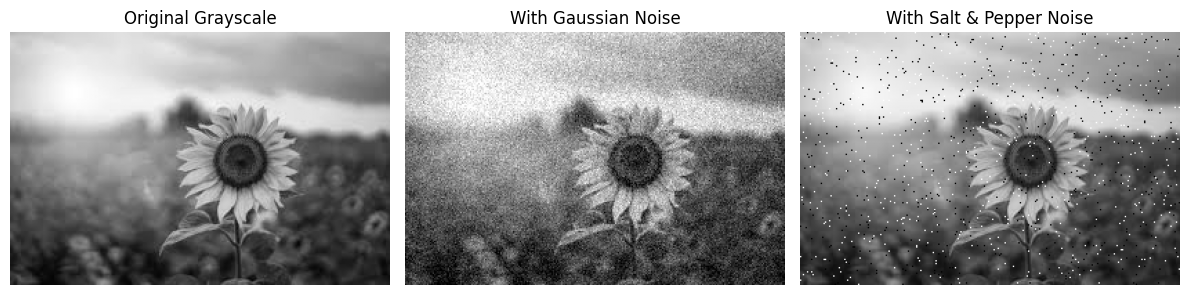

In [13]:
#Display with matplotlib 
plt.figure(figsize=(12, 4)) 
#Creates a figure for plotting with a custom size. 
plt.subplot(1, 3, 1) 
plt.imshow(gray, cmap='gray') 
plt.title("Original Grayscale") 
plt.axis('off') 
#First subplot: Original grayscale image. 
plt.subplot(1, 3, 2) 
plt.imshow(gaussian_noisy, cmap='gray') 
plt.title("With Gaussian Noise") 
plt.axis('off') 
#Second subplot: Grayscale image with Gaussian noise. 
plt.subplot(1, 3, 3) 
plt.imshow(salt_pepper_noisy, cmap='gray') 
plt.title("With Salt & Pepper Noise") 
plt.axis('off') 
#Third subplot: Grayscale image with salt-and-pepper noise. 
plt.tight_layout() 
plt.show() 
#Automatically adjusts spacing between plots. 
#Displays all three images side by side. 